# LED Bar

Building on what we learned with the LEDs we are now going to learn how to use the LED bar.

## The Grove Connector System

While the LED had a simple connection, one pin and ground, more complex peripherals need more connections. The Grove connector system tries to simplify this by creating a standard connector system for these peripherals. 

Each of your groups should have 1 LED bar and 1 PYNQ Grove Adapter. This will allow you to connect the LED bar along with a bunch of other peripherals.

## Connecting the LED Bar

The LED bar is a lot more simple to connect then the LEDs.

First the LED bar needs to be connected to the Grove cable.

Next the Grove cable needs to be connected to the PYNQ Grove Adapter.

Finally the PYNQ Grove Adapter needs to be connected the PMOD connector on the PYNQ board.

<img src=https://cdn10.bigcommerce.com/s-7gavg/products/531/images/4215/29229088904_4cf481dfc7_b__29773.1474563659.1280.1280.jpg width="400">

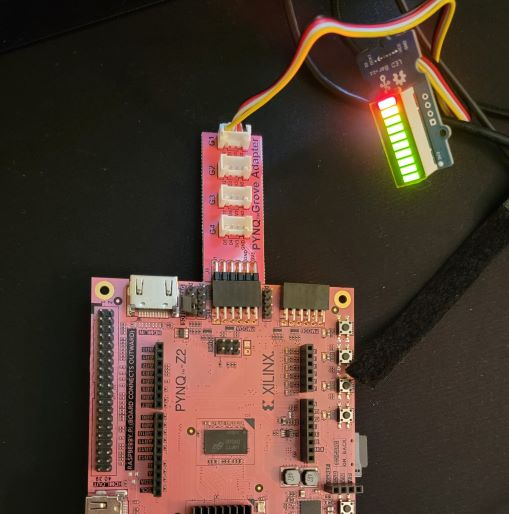

## Controlling the LED Bar

### 1. Load the Base Overlay

As always the Base Overlay needs to be loaded. The base overlay sets up the board to the default state. 

In [18]:
from pynq.overlays.base import BaseOverlay
base = BaseOverlay("base.bit")

### 2. Tell PYNQ About the LED Bar

The LED bar will be connected to connector G1 on the PYNQ Grove adapter. The PYNQ Grove adapter will be connected to PMODA on the PYNQ-Z2 board.

In [19]:
from pynq.lib.pmod import Grove_LEDbar
from pynq.lib.pmod import PMOD_GROVE_G1

ledbar = Grove_LEDbar(base.PMODA, PMOD_GROVE_G1)

### 3. Reset the LED Bar

The default state of the LED could be all sorts of things. Let's turn it fully of so we have somewhere to work from.

In [22]:
# Turn the LED bar off
ledbar.reset()

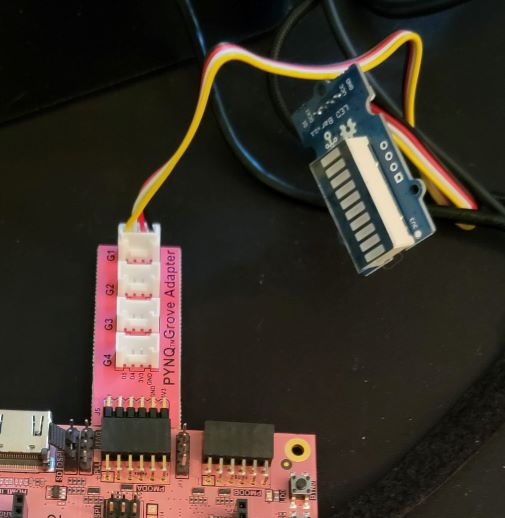

The LED bar should be blank now.

### 4. Lighting Up the LED Bar

The LED Bar supports a lot of different display configurations. Let's start with something simple, turning on all the bars.

In [23]:
ledbar.write_binary(0b1111111111)

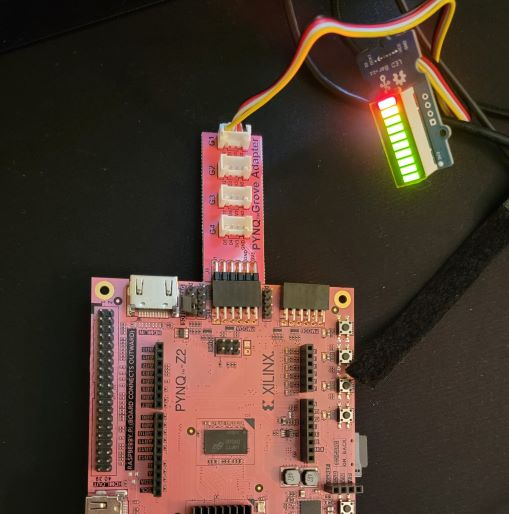

Your LED bar should be all lit up now. How did writing `0b1111111111` to the ledbar turn it on?

The LED bar speaks binary. Binary is a alternate number base used in computing. We could get into a much longer discussion about binary, but for now let's just se how the LED bar responds to different inputs.

Run the cell below and observe the output!

In [25]:
from time import sleep
ledbar.write_binary(0b0000000000)
sleep(0.25)
ledbar.write_binary(0b0000000001)
sleep(0.25)
ledbar.write_binary(0b0000000011)
sleep(0.25)
ledbar.write_binary(0b0000000111)
sleep(0.25)
ledbar.write_binary(0b0000001111)
sleep(0.25)
ledbar.write_binary(0b0000011111)
sleep(0.25)
ledbar.write_binary(0b0000111111)
sleep(0.25)
ledbar.write_binary(0b0001111111)
sleep(0.25)
ledbar.write_binary(0b0011111111)
sleep(0.25)
ledbar.write_binary(0b0111111111)
sleep(0.25)
ledbar.write_binary(0b1111111111)

Any guesses on how the LED bar interprets the binary numbers?

### 5. Light up each element of the LED Bar

Last time we blinked the LED over and over. Let's do something similar with the LED bar! Let's light up each element in sequence.

In [26]:
# Loop 5 times
for i in range(5):
    ledbar.write_binary(0b0000000001)
    sleep(0.25)
    ledbar.write_binary(0b0000000010)
    sleep(0.25)
    ledbar.write_binary(0b0000000100)
    sleep(0.25)
    ledbar.write_binary(0b0000001000)
    sleep(0.25)
    ledbar.write_binary(0b0000010000)
    sleep(0.25)
    ledbar.write_binary(0b0000100000)
    sleep(0.25)
    ledbar.write_binary(0b0001000000)
    sleep(0.25)
    ledbar.write_binary(0b0010000000)
    sleep(0.25)
    ledbar.write_binary(0b0100000000)
    sleep(0.25)
    ledbar.write_binary(0b1000000000)

Writing out the entire binary number each time can prove annoying. Let's write a quick python function to make this easier.

If we want to light up a specific element on the LED bar we use the following algorithm to convert our index to a binary number.

$binary = 2^{index}$

We can implement that in a python function as follows. Functions are a powerful tool that most programming languages provide. Functions allow us to write a single piece of code and use it again from anywhere we want. Many of the operations we have been doing (`read()`, `write_binary()`, `sleep()`) are all functions. 

If you have never worked with Python functions before there is a short tutorial you can run through [here](https://www.w3schools.com/python/python_functions.asp).

We can create functions with the `def` keyword.

We are going to name our function `element` and have it take one argument called `index`.

Finally, the function is going to return the algorithm we defined before.

In [27]:
def element(index):
    # In python the ** operator is exponentiation
    return 2**index

Let's use it to light up the middle of the LED bar. Try replacing the 5 with different numbers.

Now let's do our scrolling LED bar from before. This time, notice how much more concisely we can write it.

In [28]:
for i in range(5):
    for j in range(10):
        ledbar.write_binary(element(j))
        sleep(0.25)

### 6. Light up part of the LED bar

Let's try to light up part of the LED Bar. A display like this would be good for a battery or volume meter. A simple way to do this is to hard code the binary value we want.

In [29]:
# Light up half the LED bar
ledbar.write_binary(0b0000011111)

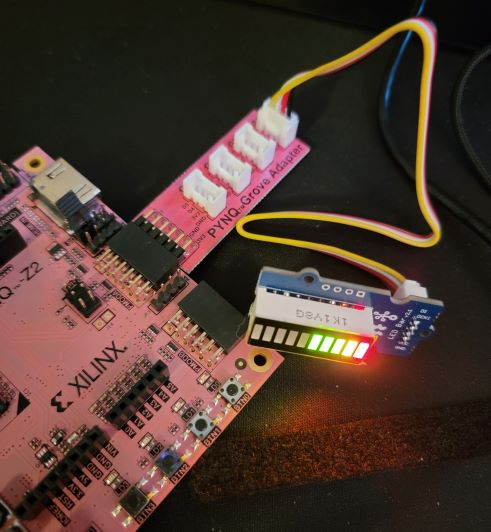

This works but, again, this is annoying to enter. Let's use our function technique from before.

The algorithm for calculating the binary number required to light up part of the LED bar is:

$binary = 2^{index+1} - 1$

Now let's implement this in a function.

In [30]:
def up_to(index):
    return 2**(index+1) - 1

Let's test it out!

In [31]:
ledbar.write_binary(up_to(5))

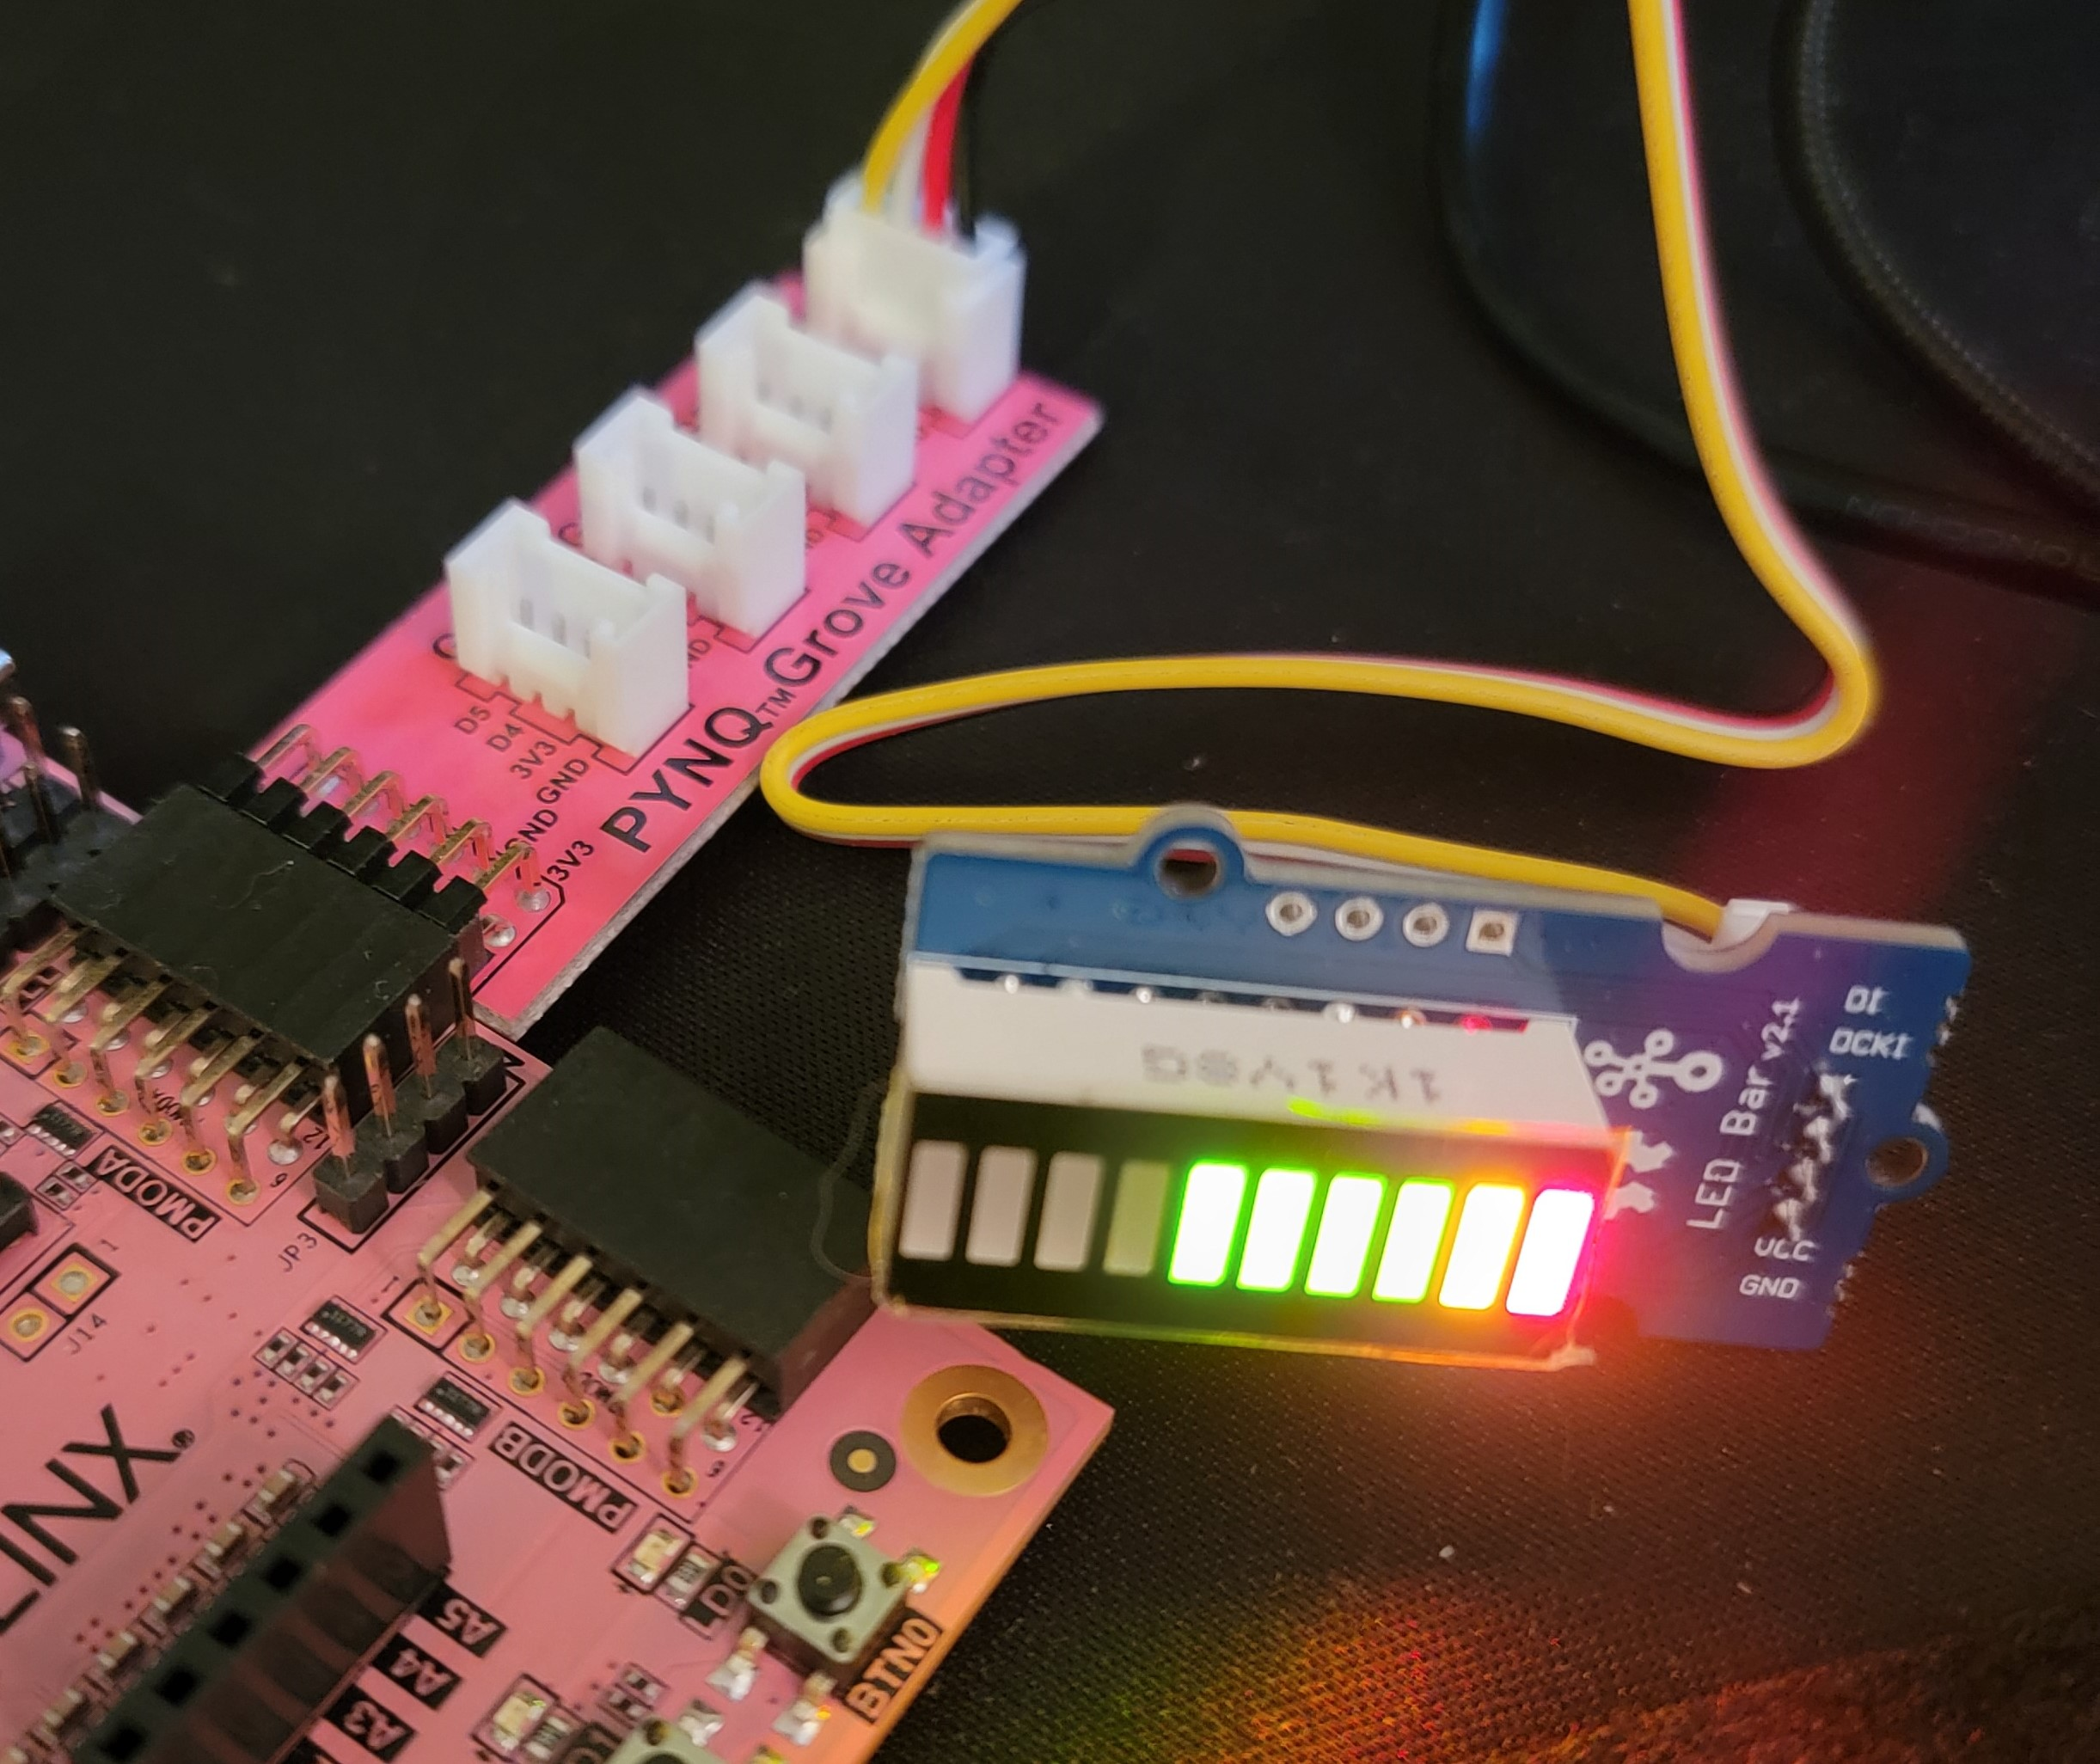

Now that we have a easy way to do this, let's try our loop method from before.

In [32]:
for i in range(5):
    for j in range(10):
        ledbar.write_binary(up_to(j))
        sleep(0.1)

This is great, but only works if we want to light up the LED bar from one end. What happens if we want to do the
other direction?

Luckily, Python has an inverse operator we can use. Check out the following cell!

In [33]:
ledbar.write_binary(~up_to(5))

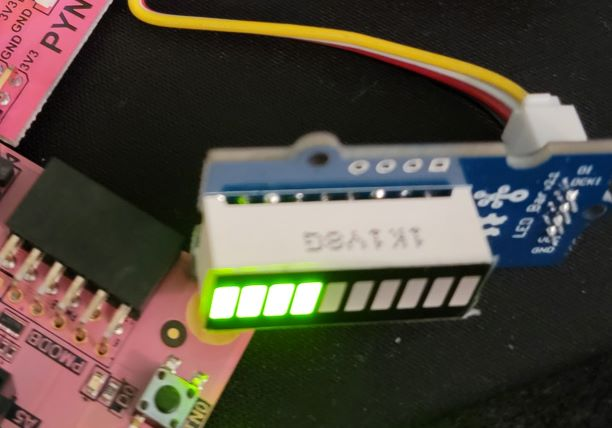

By putting the `~` character in front, we can covert a number like `0b0000111111` into `0b1111000000`.

Question: What would happen if we applied the `~` operator to the `element` function we wrote before?

Talk about this in your groups and when you have a guess give the next cell a try!

In [34]:
ledbar.write_binary(~element(5))

Cool?

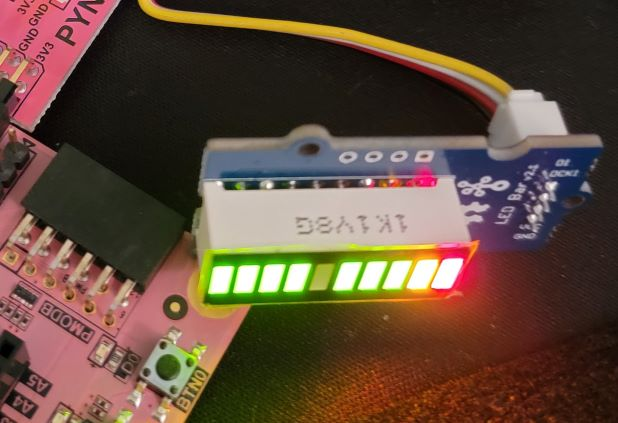

## Controlling the LED Bar with Other Peripherals

Similar to before, we are going to combine the on board buttons with the external LED Bar.

### 1. Setup the Buttons

First let's setup the on-board switches so we can read their state. 

In [35]:
buttons = base.buttons

### 2. Check the Status of the Buttons

Next, let's check is the status of the buttons. You can run this cell multiple times to see how the output changes when you hold the buttons.

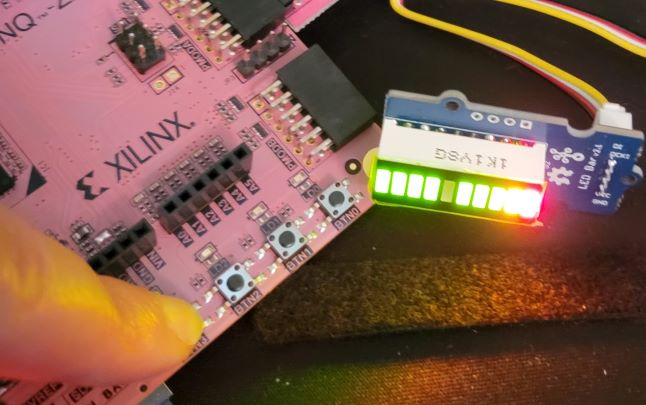

In [36]:
print(f'Button 0 {"is on" if buttons[0].read() else "is off"}')
print(f'Button 1 {"is on" if buttons[1].read() else "is off"}')
print(f'Button 2 {"is on" if buttons[2].read() else "is off"}')
print(f'Button 3 {"is on" if buttons[3].read() else "is off"}')

Button 0 is off
Button 1 is off
Button 2 is off
Button 3 is on


### 3. Control the LED Bar with the Buttons

Now, let's build a program to cycle the LED bar every time button 0 is pressed!

First, we need to to be able to wait for a button to be pressed. Run the cell below and then press button 0.

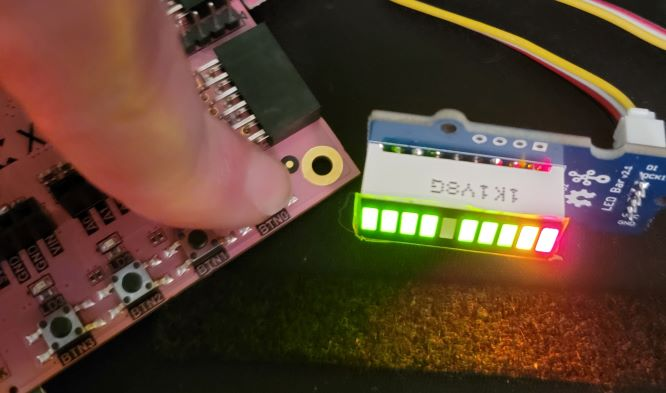

In [37]:
while buttons[0].read() == 0:
    pass
print('Button 0 was pressed')

Button 0 was pressed


Now that we have that down, let's bring back some of the LED Bar scrolling code from before.

In [38]:
for i in range(10):
    ledbar.write_binary(element(i))
    sleep(0.25)

Now we need to combine the two previous cells to create our program. I'll leave you an empty cell below to try it yourself. If you get stuck, run the next cell for a hint!

In [41]:
for i in range(10):
    ledbar.write_binary(element(i))
    while buttons[0].read() == 0:
        pass

Woah, that probably didn't do what you expected. Why did the element jump so much?

This in cause by the python code running too quickly. Before you are able to let go of the button, the for loop has already iterated 5 or more times. We can fix this by adding a sleep statement to add some delay to account for our slow reflexes!

Run the next cell and try pressing the button a few times. Try holding the button too!
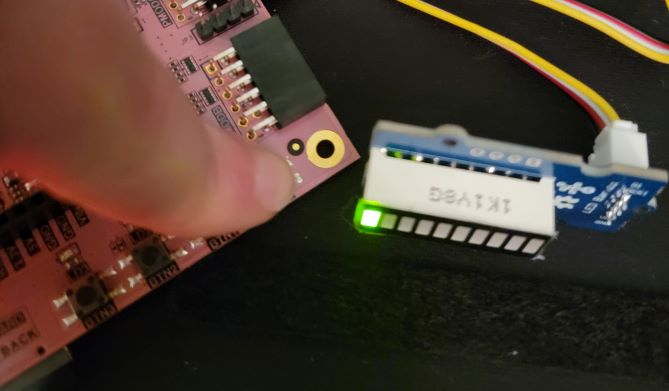

In [ ]:
for i in range(10):
    ledbar.write_binary(element(i))
    while buttons[0].read() == 0:
        pass
    sleep(0.25)


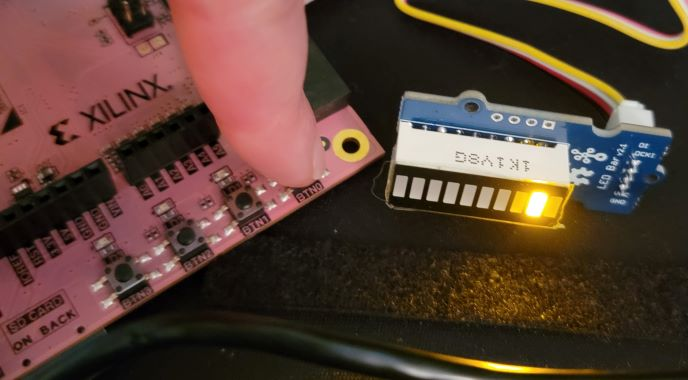

## Conclusion

You're done! You now hopefully have some understanding of how the LED bar works and how we can interact with it. Here are some more advanced activities you can give a try.

1. Flash alternating sets of lights (try using a function to make this easier).
2. Count how many times a button is pressed and display it on the LED bar.
3. Display which built in buttons and switches are being pressed (if button 0 is pressed -> led bar element 0 is lit, etc).
4. If you want to learn more about binary, check out this short video clip: https://www.youtube.com/watch?v=wgbV6DLVezo